In [391]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Загружаем данные и проверяем на пропуски

In [392]:
data = datasets.fetch_california_housing(as_frame = True)

In [393]:
data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [394]:
df = data.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [395]:
X = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]
y = df['MedHouseVal']
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [396]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [397]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [398]:
# Строим модель линейной регрессии

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 



In [400]:
model = LinearRegression()

In [401]:
model.fit(X_train, y_train)

LinearRegression()

In [402]:
pred_test = model.predict(X_test)

In [403]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
sq_test = sqrt(MSE (y_test, pred_test))
sq_test

0.7364708575718713

In [404]:
pred_train = model.predict(X_train)

In [405]:
sq_train = sqrt(MSE (y_train, pred_train))
sq_train

0.7212102447615287

In [406]:
r2_train = model.score(X_train, y_train)
r2_train

0.6103241153343966

In [407]:
r2_test = model.score(X_test, y_test)
r2_test

0.588242650759475

# Смотрим распределение целевой переменной

/Users/alexa_yakovleva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MedHouseVal'>

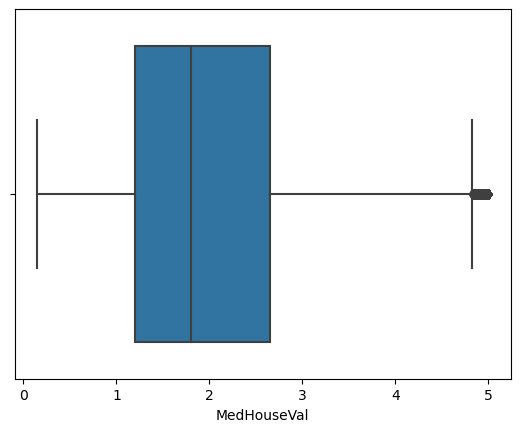

In [408]:
sns.boxplot(df['MedHouseVal'])

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

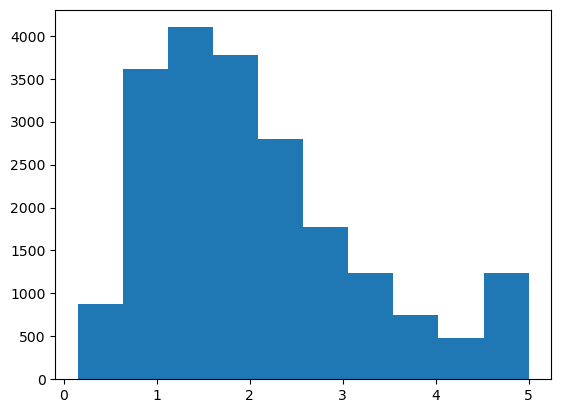

In [409]:
plt.hist(df['MedHouseVal'])

# Строим матрицу корреляции

In [410]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm') 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


    Видим, что есть сильная корреляционная зависимость между признаками 'AveRooms' и  'AveBedrms',целевой переменной и  'MedInc', широтой и долготой. Попробуем оставить только их

In [411]:
X1 = df[['MedInc'  , 'AveRooms', 'AveBedrms' ,'Latitude', 'Longitude' ]]
y1 = df['MedHouseVal']

In [412]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2) 
model = LinearRegression()

In [413]:
model.fit(X1_train, y1_train)

LinearRegression()

In [414]:
r2_1_train =model.score(X1_train, y1_train)
r2_1_train

0.5931726546337639

In [415]:
pred1_train = model.predict(X1_train)

In [416]:
sq1_train = sqrt(MSE(y1_train, pred1_train))
sq1_train

0.7371994471558351

In [417]:
r2_1_test = model.score(X1_test, y1_test)
r2_1_test

0.6042836854796749

In [418]:
pred1_test = model.predict(X1_test)
sq1_test = sqrt(MSE(y1_test, pred1_test))
sq1_test

0.7211789473857921

# Находим и убираем выбросы

In [419]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [420]:
df[df['AveRooms'] > 100]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [421]:
df = df.drop(labels = [1914, 1979], axis = 0)


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20638 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20638 non-null  float64
 1   HouseAge     20638 non-null  float64
 2   AveRooms     20638 non-null  float64
 3   AveBedrms    20638 non-null  float64
 4   Population   20638 non-null  float64
 5   AveOccup     20638 non-null  float64
 6   Latitude     20638 non-null  float64
 7   Longitude    20638 non-null  float64
 8   MedHouseVal  20638 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [423]:
X2 = df[['MedInc' , 'HouseAge', 'AveRooms','AveBedrms', 'Latitude', 'Longitude' ]]
y2 = df['MedHouseVal']

In [424]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2) 
model = LinearRegression()

In [425]:
model.fit(X2_train, y2_train)
r2_2_train = model.score(X2_train, y2_train)
r2_2_train

0.6033302347151926

In [426]:
pred2_train  = model.predict(X2_train)
sq2_train = sqrt(MSE(y2_train, pred2_train))
sq2_train

0.7239778124572628

In [427]:
r2_2_test = model.score (X2_test, y2_test)
r2_2_test

0.6251068634405568

In [428]:
pred2_test = model.predict(X2_test)
sq2_test = sqrt(MSE(y2_test, pred2_test))
sq2_test

0.7168732315986055

# Математическое действие над переменной

In [429]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [430]:
df['Population'] = df['Population']**0.5
X3 = df[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup',
       'Latitude']]
y3 = df['MedHouseVal']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X3_train, y3_train)

LinearRegression()

In [431]:
r2_3train = model.score(X3_train, y3_train)
r2_3train

0.5244698562425071

In [432]:
pred3_train = model.predict(X3_train)
sq3_train = sqrt(MSE(y3_train, pred3_train))
sq3_train

0.7959699490638616

In [433]:
r2_3test = model.score(X3_test, y3_test)
r2_3test

0.5171028063207166

In [434]:
pred3_test = model.predict(X3_test)
sq3_test = sqrt(MSE(y3_test, pred3_test))
sq3_test

0.8003830689645335

# Сводная таблица метрик

In [435]:
results = pd.DataFrame(columns=['Model','RMSE','R2','Работа с переменными'])

results.loc[len(results)] = ['test',sq_test,r2_test,'Все значения']
results.loc[len(results)] = ['train',sq_train,r2_train,'Все значения']

results.loc[len(results)] = ['test1',sq1_test,r2_1_test,'Удаление признаков']
results.loc[len(results)] = ['train1',sq1_train,r2_1_train,'Удаление признаков']

results.loc[len(results)] = ['test2',sq2_test,r2_2_test,'Ликвидация выбросов']
results.loc[len(results)] = ['train2',sq2_train,r2_2_train,'Ликвидация выбросов']

results.loc[len(results)] = ['test3',sq3_test,r2_3test,'Квадратный корень из Population']
results.loc[len(results)] = ['train3',sq3_train, r2_3train,'Квадратный корень из Population']

results

,Model,RMSE,R2,Работа с переменными
0,test,0.736471,0.588243,Все значения
1,train,0.721210,0.610324,Все значения
2,test1,0.721179,0.604284,Удаление признаков
3,train1,0.737199,0.593173,Удаление признаков
4,test2,0.716873,0.625107,Ликвидация выбросов
5,train2,0.723978,0.603330,Ликвидация выбросов
6,test3,0.800383,0.517103,Квадратный корень из Population
7,train3,0.795970,0.524470,Квадратный корень из Population


# Выводы
В данном датасете наилучший результат модели линейной регрессии мы получаем при работе с выбросами. Возможно, стоило взять ниже порог для выбросов, чтоб результат был лучше